# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as colors
import seaborn as sns
import IPython
import numpy as np

from EnergyShedModel import EnergyShedModel
from plots import status_stackplot, cost_lineplot, transfer_lineplot, reward_lineplot, animation_plot, q_values_plot

# Model parameters

In [ ]:
NUM_STEPS = 7

GRID_SIZE = 20
POP_SIZE = GRID_SIZE * GRID_SIZE

SUNNY_PROB = 0.75
PERCENT_PRODUCERS = 0.5

# Grid agent

In [ ]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "grid", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()

results.reporters
# results.variables.EnergyShedModel

### Visualization

In [ ]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Grid Model Results")

In [ ]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

# Reflex agents

## Selling agent

In [ ]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "reflex_sell", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()
results.reporters

### Visualization

In [ ]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Reflex Model")

In [ ]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

## Storing agent

In [ ]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "reflex_store", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()
results.reporters

### Visualization

In [ ]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Reflex Model")

In [ ]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

# Q-learning agent

In [50]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "qlearning", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()
results.reporters
# results.variables.EnergyShedModel

Completed: 7 steps
Run time: 0:00:02.295286
Simulation finished


,seed,Per household local energy transfer,Per household grid energy transfer,Peak energy production,Total Energy Production,Total local Transfer,Total grid Transfer,Number of producers,Total Cost
0,334862528961352536050199119122908963670,"[10.0, 0, 0.03147573449894914, 0, 10.0, 10.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2253.828029,16094.964636,944.576192,6547.159962,203,-81916.455865


### Visualization

In [ ]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

Text(0.5, 0.98, 'Q-Learning Model')

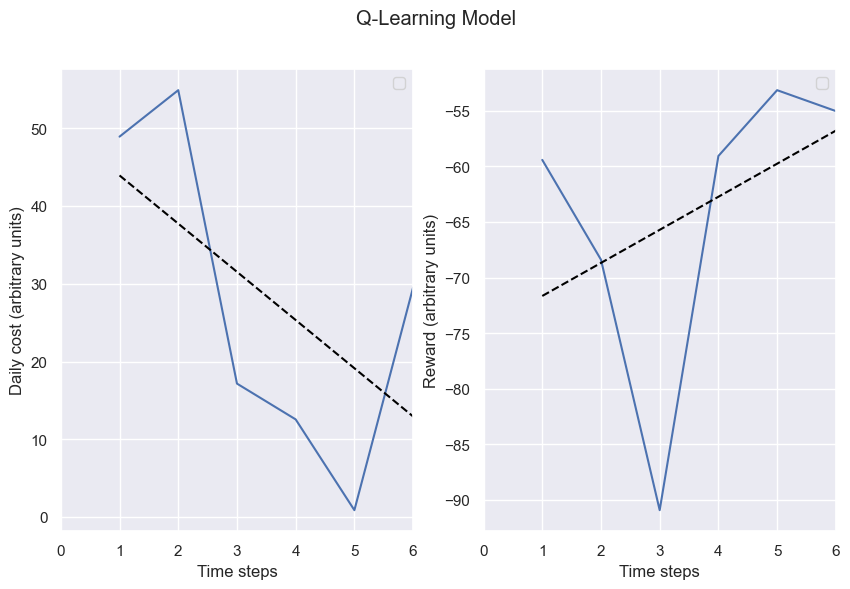

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
# transfer_lineplot(results.variables.EnergyShedModel, ax=ax1)
reward_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Q-Learning Model")

In [ ]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

In [ ]:
fig = plt.figure()
plt.subplots_adjust(left=0.4, right=0.9, bottom=0.1, top=0.9)
q_values = results.variables.EnergyShedModel["q_values"]
anim = FuncAnimation(fig, q_values_plot, fargs=(q_values,), frames=range(len(q_values)), interval=500)
IPython.display.HTML(anim.to_jshtml())

# Experiments

In [57]:
avg_daily_costs = {"grid": [], "reflex_sell": [], "reflex_store": [], "qlearning": []}

for agent_type in ["grid", "reflex_sell", "reflex_store", "qlearning"]:
    parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": agent_type, "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}
    for i in range(25):
        model = EnergyShedModel(parameters)
        results = model.run()
        avg_daily_cost = sum(results.variables.EnergyShedModel["daily_cost"]) / len(results.variables.EnergyShedModel["daily_cost"])
        avg_daily_costs[agent_type].append(avg_daily_cost)

Completed: 7 steps
Run time: 0:00:00.031389
Simulation finished
Completed: 7 steps
Run time: 0:00:00.025174
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024712
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024882
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024298
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024276
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024558
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024518
Simulation finished
Completed: 7 steps
Run time: 0:00:00.025692
Simulation finished
Completed: 7 steps
Run time: 0:00:00.035753
Simulation finished
Completed: 7 steps
Run time: 0:00:00.029943
Simulation finished
Completed: 7 steps
Run time: 0:00:00.030513
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024754
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024417
Simulation finished
Completed: 7 steps
Run time: 0:00:00.024471
Simulation finished
Completed: 7 steps
Run time: 0:00:00.025

In [60]:
for agent_type in ["grid", "reflex_sell", "reflex_store", "qlearning"]:
    print(f"{agent_type}: {avg_daily_costs[agent_type]}")

for agent_type in ["grid", "reflex_sell", "reflex_store", "qlearning"]:
    print(f"{agent_type}: {np.mean(avg_daily_costs[agent_type])}")

grid: [-50.26984229918354, -52.55530167752673, -45.275019815229804, -49.34651474384404, -45.86330774053556, -50.68937500188643, -45.747808944116414, -46.022756565033134, -52.96692748374507, -48.662253112281356, -50.00883937426827, -48.87058507299441, -48.124760135844525, -43.31570786576435, -48.37408334378456, -46.995138112079765, -48.232639866182396, -51.7779514607872, -41.3141713357504, -47.37931926363506, -51.910177442538654, -49.320369645839115, -43.44950687742818, -43.97320088309726, -45.02216142735743]
reflex_sell: [-47.9937762352077, -43.623399639804795, -44.56525628037153, -44.79859902648669, -45.78089625406252, -41.37902575033148, -45.97877587220615, -37.335277670872394, -42.779555867517814, -49.84531573114081, -38.27664339388007, -49.157471796262215, -41.50307482760103, -41.74958142389225, -35.34655947092653, -46.08782677365772, -43.890839451224394, -40.35919917538284, -43.660283476744944, -39.8929765708028, -45.5679200902148, -42.61561934411537, -43.5971400007834, -43.079752

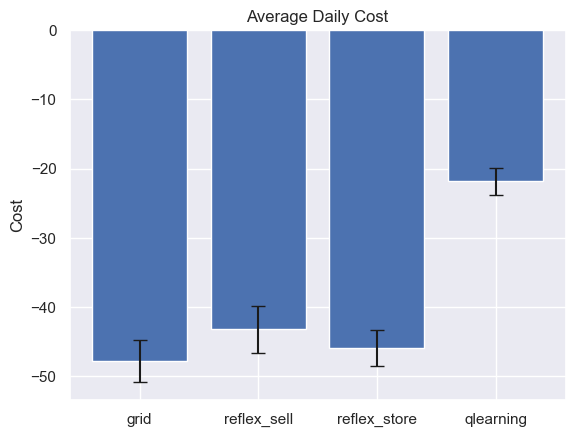

In [59]:
avg_daily_costs_mean = {k: np.mean(v) for k, v in avg_daily_costs.items()}
avg_daily_costs_std = {k: np.std(v) for k, v in avg_daily_costs.items()}

plt.bar(avg_daily_costs_mean.keys(), avg_daily_costs_mean.values(), yerr=avg_daily_costs_std.values(), capsize=5)
plt.title("Average Daily Cost")
plt.ylabel("Cost")
plt.show()
